# OLA 2023
## Project overview
In order to get the project overview, we need to understand how the three classes differ

We start by importing the libraries

In [1]:
from utils.User_Classes import UserClass

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

### Let's define the three classes and observe their differences
+ C1: young, interested in trekking users
+ C2: middle-aged, interested in trekking users
+ C3: young, not interested in trekking users

In [2]:
uc1 = UserClass(name = "C1")
uc2 = UserClass(name = "C2")
uc3 = UserClass(name = "C3")

To show the differences among the three classes, we start by defining some possible bids. In our case, we consider 20 possible values for the bids, which are contained in the interval $[0,3]$ and equally distributed

In [3]:
bids = np.linspace(0.0, 3, 20) #the bids go from 0 to 3 with 20 equal-length steps
x_pred = np.atleast_2d(bids).T #transformation is done in order to plot it easily
x_pred

array([[0.        ],
       [0.15789474],
       [0.31578947],
       [0.47368421],
       [0.63157895],
       [0.78947368],
       [0.94736842],
       [1.10526316],
       [1.26315789],
       [1.42105263],
       [1.57894737],
       [1.73684211],
       [1.89473684],
       [2.05263158],
       [2.21052632],
       [2.36842105],
       [2.52631579],
       [2.68421053],
       [2.84210526],
       [3.        ]])

### The bid/cost curve

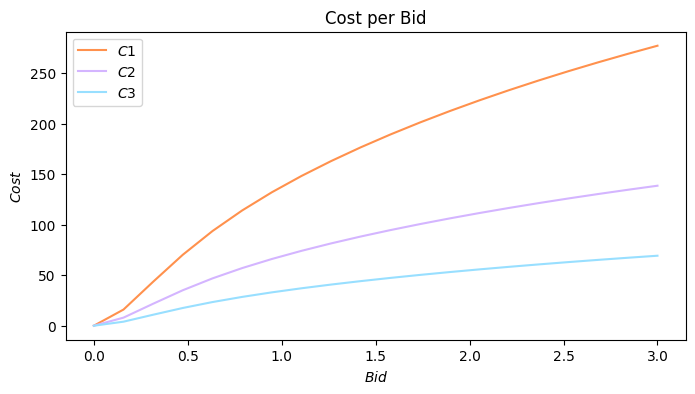

In [4]:
colors = ['#ff914d', '#d4b5ff', '#98dfff']

plt.figure(figsize=(8, 4))
plt.plot(x_pred, uc1.get_total_cost(x_pred), colors[0], label=r'$C1$')
plt.plot(x_pred, uc2.get_total_cost(x_pred), colors[1], label=r'$C2$')
plt.plot(x_pred, uc3.get_total_cost(x_pred), colors[2], label=r'$C3$')
plt.xlabel('$Bid$')
plt.ylabel('$Cost$')
plt.title("Cost per Bid")
plt.legend()
plt.show()

### The Click/Bid curve

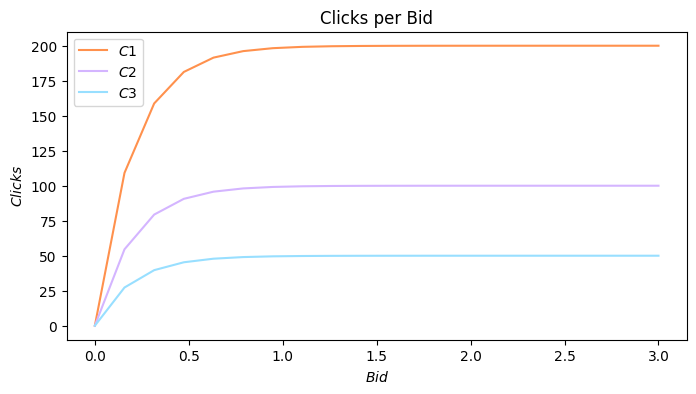

In [5]:
colors = ['#ff914d', '#d4b5ff', '#98dfff']

plt.figure(figsize=(8, 4))
plt.plot(x_pred, uc1.get_click_bids(x_pred), colors[0], label=r'$C1$')
plt.plot(x_pred, uc2.get_click_bids(x_pred), colors[1], label=r'$C2$')
plt.plot(x_pred, uc3.get_click_bids(x_pred), colors[2], label=r'$C3$')
plt.xlabel('$Bid$')
plt.ylabel('$Clicks$')
plt.legend()
plt.title("Clicks per Bid")
plt.show()

### The conversion rates

In [6]:
from utils.parameters import prices, classes

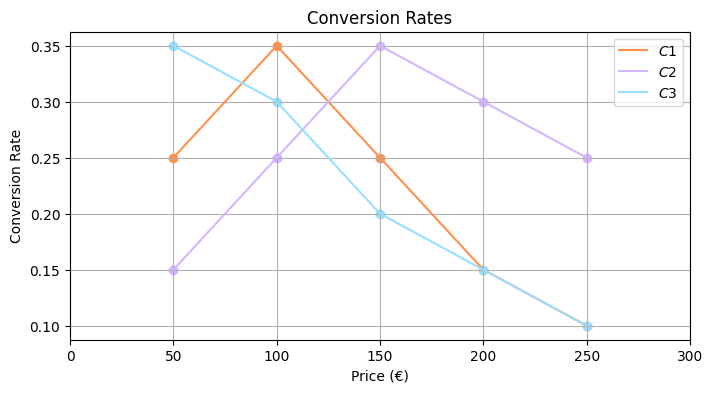

In [7]:
colors = ['#ff914d', '#d4b5ff', '#98dfff']


plt.figure(figsize=(8, 4))
for class_index in range(len(classes)):
    conv_prob = classes[class_index].get_conversion_probabilities()
    smooth = interp1d(prices, conv_prob, kind='cubic')
    plt.plot(prices, smooth(prices), color=colors[class_index], label=f'$C{class_index + 1}$')
    plt.scatter(prices, conv_prob, color=colors[class_index])
plt.title("Conversion Rates")
plt.xlabel("Price (€)")
plt.grid()
plt.ylabel("Conversion Rate")
plt.legend()        
plt.xlim(0, 300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


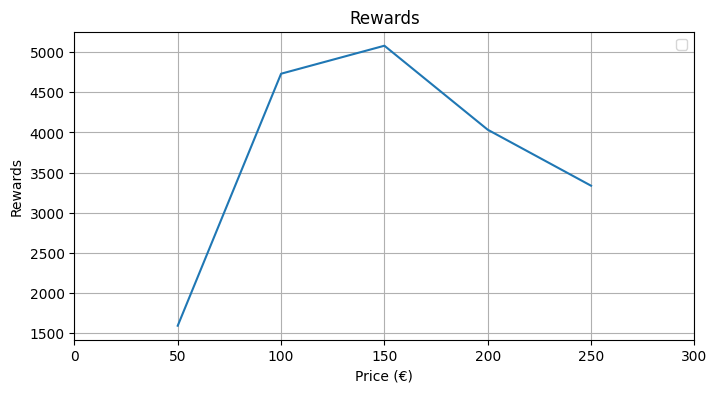

In [8]:
colors = ['#ff914d', '#d4b5ff', '#98dfff']
from utils.clairvoyant_tools import calculate_reward_for_class, get_optimal_parameters
from utils.parameters import prices

optimum_price, optimum_bid, opt = get_optimal_parameters(uc1.user_index)

rewards = [calculate_reward_for_class(uc1.user_index, i, optimum_bid) for i in range(len(prices))]

plt.figure(figsize=(8, 4))
plt.plot(prices, rewards)
plt.title("Rewards")
plt.xlabel("Price (€)")
plt.grid()
plt.ylabel("Rewards")
plt.legend()        
plt.xlim(0, 300)
plt.show()